In [ ]:
 ̑import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sbrn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# from mixed_naive_bayes import MixedNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
df = pd.read_csv("IQR_data.csv")
df=df.drop(columns=['Unnamed: 0'])
df

,Year,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Weather_Condition,Traffic_Signal,Sunrise_Sunset,TimeDiff
0,2016,2,39.063148,-84.032608,0.010,State Route 32,Williamsburg,Clermont,OH,KI69,36.0,33.3,10.0,SW,Overcast,True,Night,30.0
1,2016,3,39.747753,-84.205582,0.010,I-75 S,Dayton,Montgomery,OH,KDAY,35.1,31.0,9.0,SW,Mostly Cloudy,False,Night,30.0
2,2016,2,39.627781,-84.188354,0.010,Miamisburg Centerville Rd,Dayton,Montgomery,OH,KMGY,36.0,33.3,6.0,SW,Mostly Cloudy,True,Day,30.0
3,2016,3,40.100590,-82.925194,0.010,Westerville Rd,Westerville,Franklin,OH,KCMH,37.9,35.5,7.0,SSW,Light Rain,False,Day,30.0
4,2016,2,39.758274,-84.230507,0.000,N Woodward Ave,Dayton,Montgomery,OH,KDAY,34.0,31.0,7.0,WSW,Overcast,False,Day,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243014,2017,2,38.765632,-111.353007,0.159,US-50 W,Richfield,Sevier,UT,KU24,57.0,57.0,10.0,SW,Partly Cloudy,False,Night,360.0
243015,2017,2,39.764370,-105.593050,0.321,I-70 E,Dumont,Clear Creek,CO,K0CO,46.4,37.2,10.0,West,Overcast,False,Day,360.0
243016,2017,4,39.919750,-75.576910,0.277,Wilmington Pike,West Chester,Chester,PA,KOQN,63.0,63.0,10.0,CALM,Fair,True,Night,360.0
243017,2017,4,36.034630,-79.054100,0.331,Old NC Highway 10,Chapel Hill,Orange,NC,KIGX,63.0,63.0,10.0,NNE,Mostly Cloudy,False,Night,360.0


In [ ]:
print('Column names in the dataset are: \n{}'.format(('\n').join(df.columns)))

Column names in the dataset are: 
Year
Severity
Start_Lat
Start_Lng
Distance(mi)
Street
City
County
State
Airport_Code
Temperature(F)
Wind_Chill(F)
Visibility(mi)
Wind_Direction
Weather_Condition
Traffic_Signal
Sunrise_Sunset
TimeDiff


In [ ]:
X = df.drop(columns='Severity')
y = df['Severity']
df['TimeDiff'] = df['TimeDiff']/60

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243019 entries, 0 to 243018
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               243019 non-null  int64  
 1   Severity           243019 non-null  int64  
 2   Start_Lat          243019 non-null  float64
 3   Start_Lng          243019 non-null  float64
 4   Distance(mi)       243019 non-null  float64
 5   Street             243019 non-null  object 
 6   City               243019 non-null  object 
 7   County             243019 non-null  object 
 8   State              243019 non-null  object 
 9   Airport_Code       243019 non-null  object 
 10  Temperature(F)     243019 non-null  float64
 11  Wind_Chill(F)      243019 non-null  float64
 12  Visibility(mi)     243019 non-null  float64
 13  Wind_Direction     243019 non-null  object 
 14  Weather_Condition  243019 non-null  object 
 15  Traffic_Signal     243019 non-null  bool   
 16  Su

In [ ]:
numerical_features = []
categorical_features = []
for column in X.columns:
    if (df[column].dtype == 'float64' or df[column].dtype == 'int64'):
        numerical_features.append(column)
    elif (df[column].dtype == 'object' or df[column].dtype == 'bool'):
        categorical_features.append(column)

In [ ]:
print('There are a total of {} numerical features in the dataset.'.format(len(numerical_features)))
numerical_features


There are a total of 8 numerical features in the dataset.


['Year',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Visibility(mi)',
 'TimeDiff']

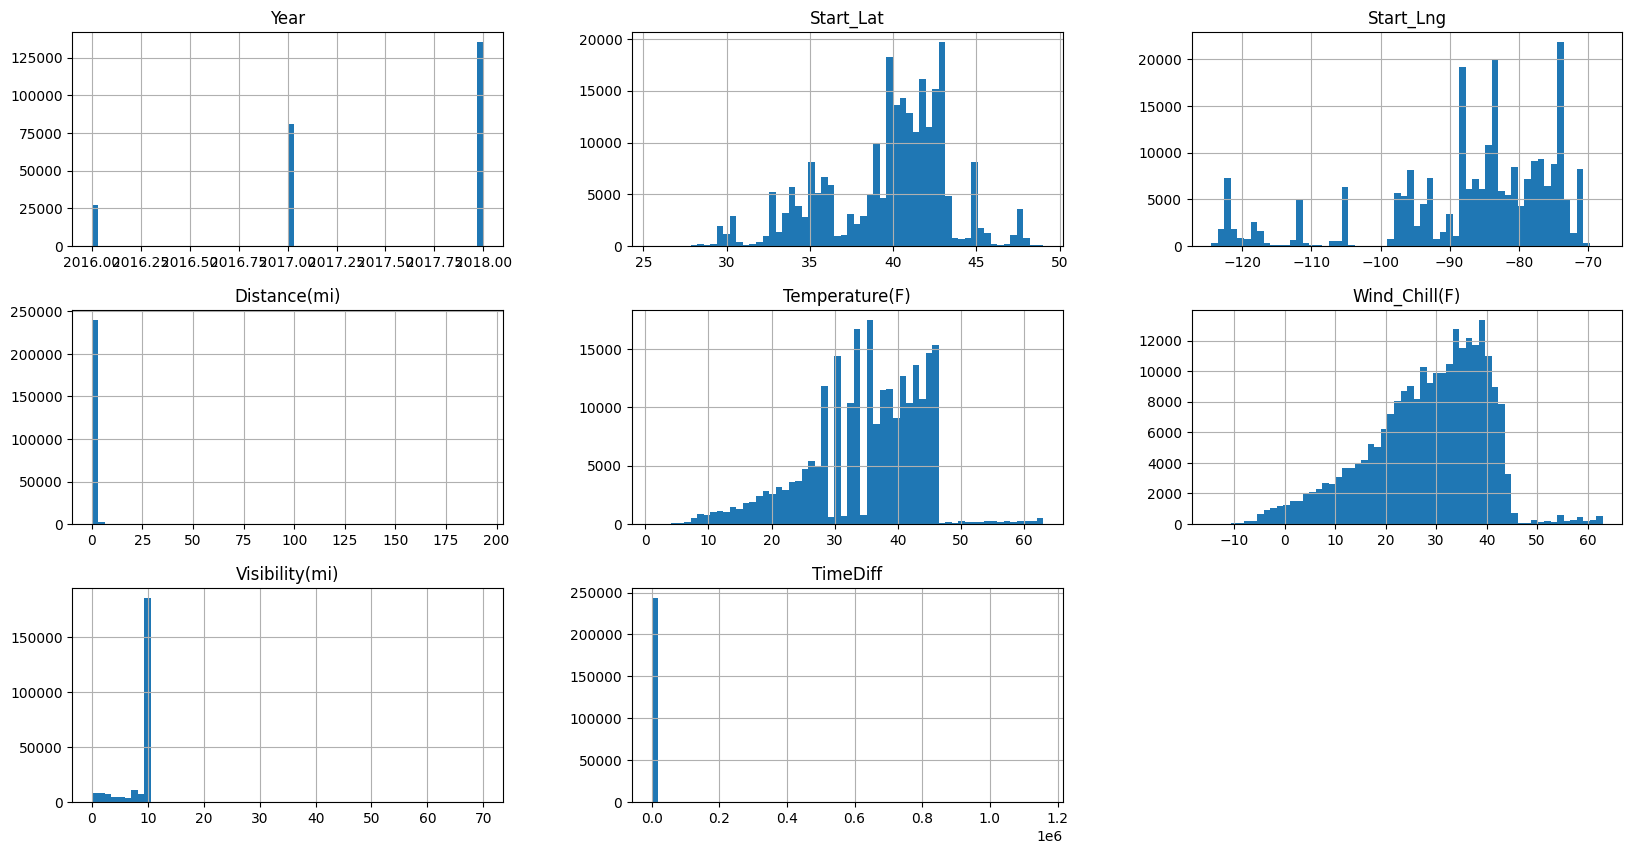

In [ ]:
X_num_total = X[numerical_features]
X_num_total.hist(bins=60,figsize=(20, 10))
plt.show()

In [ ]:
print('Uniques values of Accident Index column are: {}'.format(X_num_total['TimeDiff'].nunique()))

Uniques values of Accident Index column are: 3822


In [ ]:
X_cat_total = X[categorical_features]
print('Unique values for each categorical column are:\n {}'.format(X_cat_total.nunique()))

Unique values for each categorical column are:
 Street               42361
City                  6857
County                1277
State                   49
Airport_Code          1616
Wind_Direction          23
Weather_Condition       70
Traffic_Signal           2
Sunrise_Sunset           2
dtype: int64


In [ ]:
X = X.drop(columns=['City','Street','County','Airport_Code'])

In [ ]:
numerical_features.remove('Year')
categorical_features.append('Year')
categorical_features.remove('City')
categorical_features.remove('Street')
categorical_features.remove('County')
categorical_features.remove('Airport_Code')

In [ ]:
# categorical feature list
categorical_features_index = list()
# Encode categorical features, get the indexes of categorical
for i in categorical_features:
    categorical_features_index.append(X.columns.get_loc(i))
    X[i] = LabelEncoder().fit_transform(X[i])

In [ ]:
# numerical feature list
numerical_features_index = list()
# Encode num features, get the indexes of categorical
for i in numerical_features:
    numerical_features_index.append(X.columns.get_loc(i))
    # X[i] = LabelEncoder().fit_transform(X[i])

In [ ]:
y = LabelEncoder().fit_transform(y)

In [ ]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.2, random_state = 18)


In [ ]:
mixed_nb_alpha = [1.0,2.0,3.0,4.0,5.0]



In [ ]:
categorical_features_index

[4, 8, 9, 10, 11, 0]

In [ ]:
X_train

,Year,Start_Lat,Start_Lng,Distance(mi),State,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Weather_Condition,Traffic_Signal,Sunrise_Sunset,TimeDiff
136039,2,33.508224,-86.882599,0.00,0,30.0,20.5,10.0,10,43,0,0,59.266667
123250,2,34.900211,-80.981483,0.00,38,46.0,39.3,10.0,20,2,0,0,60.833333
204412,1,43.012268,-83.685829,0.00,20,35.1,26.4,10.0,15,2,0,0,29.633333
58150,2,41.038681,-73.951370,0.00,32,36.0,26.7,10.0,9,43,0,0,29.650000
155510,2,40.725399,-73.894981,0.00,32,21.9,3.4,0.2,10,59,1,0,29.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142528,2,42.978516,-77.232529,0.00,32,28.0,22.8,6.0,8,46,0,1,45.683333
146239,2,42.641525,-83.238564,0.00,20,28.0,18.6,10.0,9,46,0,0,29.500000
155694,2,40.562443,-75.983597,0.00,36,21.2,6.0,2.5,8,34,0,0,29.200000
35469,1,42.417213,-82.937149,0.01,20,35.1,27.4,2.5,4,30,0,0,29.800000


In [ ]:
L = [[{}] *4]*5
print(L)

[[{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}]]


In [ ]:
L[1][2]

{}

In [ ]:
categorical_features

['State',
 'Wind_Direction',
 'Weather_Condition',
 'Traffic_Signal',
 'Sunrise_Sunset',
 'Year']

In [ ]:
numerical_features_index, categorical_features_index

([1, 2, 3, 5, 6, 7, 12], [4, 8, 9, 10, 11, 0])

In [ ]:
class NBC:
    def __init__(self,X_train,y_possible,y_train,catIndex, numIndex):
        self.X_train = X_train
        self.y_train = y_train
        self.y_possible = y_possible
        self.n = len(X_train)
        self.m = len(X_train.columns)
        self.y_possible = y_possible
        self.grid = [[{} for i in range(len(y_possible)+1)] for j in range(len(catIndex))]
        self.cat = [{} for i in range(len(catIndex))]
        self.catIndex = catIndex
        self.numIndex = numIndex
        self.Mean = [{} for i in range(len(numIndex)) ]
        print(self.Mean)
        print(type(self.Mean[0]))
        self.std = [{} for i in range(len(numIndex))]
        self.total = [0] * (len(y_possible)+1)
        self.dest = {}
        self.destInd = {}
        print(self.catIndex)
        print(self.numIndex)

    def train(self):
        print("Iniating Training")
        for i in range(self.n):
            try:
                self.total[self.y_train[i]]+=1
            except:
                print(self.y_possible)
            for j in range(len(self.catIndex)):
                j1=self.catIndex[j]
                # print(j1,j,"i",i)
                if(self.grid[j][self.y_train[i]].get(self.X_train.iat[i,j1]) == None):
                    self.grid[j][self.y_train[i]][self.X_train.iat[i,j1]]=1
                else:
                    self.grid[j][self.y_train[i]][self.X_train.iat[i,j1]]+=1
                if(self.cat[j].get(self.X_train.iat[i,j1]) == None):
                    self.cat[j][self.X_train.iat[i,j1]]=1
                else:
                    self.cat[j][self.X_train.iat[i,j1]]+=1
                # print(self.grid)
                # print(self.cat)

        for i in range(self.n):
            y = self.y_train[i]
            for j in range(len(self.numIndex)):
                j1 = self.numIndex[j]
                if((self.Mean[j]).get(y) ==None):
                    self.Mean[j][y] = self.X_train.iat[i,j1]/self.total[y]
                else:
                    self.Mean[j][y]+= self.X_train.iat[i,j1]/self.total[y]

        for i in range(self.n):
            y = self.y_train[i]
            for j in range(len(self.numIndex)):
                j1 = self.numIndex[j]
                if((self.std[j]).get(y) ==None):
                    self.std[j][y] = ((self.X_train.iat[i,j1]-self.Mean[j][y])**2)/self.total[y]
                else:
                    self.std[j][y]+= ((self.X_train.iat[i,j1]-self.Mean[j][y])**2)/self.total[y]

        for j in range(len(self.numIndex)):
            j1 = self.numIndex[j]
            self.dest[j1] = 'n'
            self.destInd[j1] = j

        for j in range(len(self.catIndex)):
            j1 = self.catIndex[j]
            self.dest[j1] = 'c'
            self.destInd[j1] = j
        print(self.dest)
        print(self.destInd)
        print(self.grid)
        print(self.cat)
        print("Std",self.std)
        print("Mean",self.Mean)
        print("Total",self.total)

    def predict(self,Xtest,ind=0):
        try:
            zero=0
            Xtest.iloc[ind]
            curr=0
            maxip=0
            for j in range(len(self.y_possible)):
                # print("j",j)
                p=(self.total[j]+1/(self.X_train[self.X_train.columns[0]].count()+len(self.y_possible)))
                for i in range(len(self.catIndex)+len(self.numIndex)):
                    if(self.dest[i]=='c'):
                        # print("hi")
                        j1 = self.destInd[i]
                        # print("hi1")
                        if(self.cat[j1].get(Xtest.iat[ind,i])==None):
                            p*=1/len(self.y_possible)
                        elif(self.grid[j1][j].get(Xtest.iat[ind,i])==None):
                            p*=5/(self.cat[j1][Xtest.iat[ind,i]] + 5*len(self.y_possible))
                        else:
                            p*=(self.grid[j1][j][Xtest.iat[ind,i]]+5)/(self.cat[j1][Xtest.iat[ind,i]] + 5*len(self.y_possible))
                        # print("hi2")
                    else :
                        # print("hi3")
                        j1 = self.destInd[i]
                        s=1
                        m=0
                        # print("hi4")
                        if(self.std[j1].get(j)!=None and self.std[j1].get(j)!=0):
                            s=self.std[j1][j]
                            # print("std")
                        if(self.Mean[j1].get(j)!=None):
                            m=self.Mean[j1][j]
                            # print("M")
                        # print("hi5")
                        p*=(1/(s)**0.5)*np.exp(-1*((Xtest.iat[ind,i]-m)**2/(2*s)) )
                        # print(2)
                if(p>maxip):
                    curr=j
                    maxip=p
                if(p==0):
                    zero+=1
            return curr,zero
        except :
            return -1,-1

    def accuracy_score(self,X_Test,yTest):
        test =0
        z=[]
        Z=0
        ans=[]
        for i in range(X_Test[X_test.columns[0]].count()):
            val,zero = self.predict(X_Test,i)
            ans.append(val)
            z.append(zero)
            Z+=zero
            if(val<0):
                print(i,"Invalid")
                break
            else:
                if(val==yTest[i]):
                    test+=1
        print("Accuracy",test," ",X_Test[X_train.columns[0]].count())
        print("ZEROS",z)
        print(Z)
        print(ans)
        accuracy = accuracy_score(yTest, ans)
        confusion = confusion_matrix(yTest, ans)
        classification_rep = classification_report(yTest, ans)
        print("Accuracy")
        print(accuracy)
        print("confusion_matrix")
        print(confusion)
        print("classification_report")
        print(classification_rep)


In [ ]:
o = NBC(X_train,[1,2,3,4],y_train,categorical_features_index,numerical_features_index)

[{}, {}, {}, {}, {}, {}, {}]
<class 'dict'>
[4, 8, 9, 10, 11, 0]
[1, 2, 3, 5, 6, 7, 12]


In [ ]:
o.train()

Iniating Training
{1: 'n', 2: 'n', 3: 'n', 5: 'n', 6: 'n', 7: 'n', 12: 'n', 4: 'c', 8: 'c', 9: 'c', 10: 'c', 11: 'c', 0: 'c'}
{1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5, 12: 6, 4: 0, 8: 1, 9: 2, 10: 3, 11: 4, 0: 5}
[[{18: 3, 3: 5, 16: 1, 36: 7, 22: 1, 29: 2, 40: 2, 5: 4, 0: 1, 8: 1, 20: 5, 33: 5, 34: 1, 27: 1, 32: 2, 9: 2, 12: 2, 38: 2, 13: 2, 21: 1, 45: 3, 41: 2}, {38: 3881, 20: 8389, 32: 9311, 33: 4201, 43: 2589, 13: 2384, 36: 7900, 42: 1945, 45: 2224, 41: 4170, 35: 1094, 12: 9292, 27: 2655, 34: 2949, 3: 3603, 25: 6726, 10: 634, 15: 844, 21: 2914, 40: 2509, 22: 775, 16: 725, 9: 1345, 28: 534, 4: 2673, 29: 3171, 8: 571, 46: 825, 17: 2594, 48: 15, 11: 81, 2: 406, 5: 959, 37: 440, 18: 1363, 0: 615, 7: 358, 23: 94, 31: 368, 19: 159, 30: 200, 6: 121, 14: 121, 47: 82, 1: 33, 44: 43, 24: 15, 39: 2, 26: 1}, {0: 388, 32: 6510, 40: 1199, 42: 1319, 36: 2084, 22: 1508, 43: 2470, 29: 1461, 28: 159, 20: 5843, 3: 1813, 25: 984, 33: 2328, 37: 664, 12: 3034, 13: 864, 46: 954, 21: 3805, 9: 1847, 38: 1150, 41

In [ ]:
o.accuracy_score(X_train,y_train)

Accuracy 104045   155532
ZEROS [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
o.accuracy_score(X_valid,y_valid)

Accuracy 25885   38883
ZEROS [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
o.accuracy_score(X_test,y_test)

In [ ]:
X_new = X_train.drop(columns =['Start_Lng','Start_Lat'])
NumInd = numerical_features_index.copy()


In [ ]:
o1 = NBC(X_train.head(100),[1,2,3,4],y_train[:100],categorical_features_index,numerical_features_index)

[{}, {}, {}, {}, {}, {}, {}]
<class 'dict'>
[4, 8, 9, 10, 11, 0]
[1, 2, 3, 5, 6, 7, 12]


In [ ]:
o1.train()

Iniating Training
{1: 'n', 2: 'n', 3: 'n', 5: 'n', 6: 'n', 7: 'n', 12: 'n', 4: 'c', 8: 'c', 9: 'c', 10: 'c', 11: 'c', 0: 'c'}
{1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5, 12: 6, 4: 0, 8: 1, 9: 2, 10: 3, 11: 4, 0: 5}
[[{}, {38: 2, 20: 9, 32: 8, 33: 5, 43: 2, 13: 1, 36: 4, 42: 2, 45: 3, 41: 1, 35: 2, 12: 5, 27: 3, 34: 2, 3: 1, 25: 3, 10: 2, 15: 1, 21: 2, 40: 2, 22: 1, 16: 1, 9: 1, 28: 1, 4: 1, 29: 1}, {0: 1, 32: 3, 40: 2, 42: 2, 36: 2, 22: 1, 43: 2, 29: 1, 28: 1, 20: 3, 3: 2, 25: 2, 33: 1, 37: 1, 12: 1, 13: 2, 46: 2, 21: 2, 9: 1, 38: 1}, {22: 1}, {}], [{}, {20: 8, 15: 4, 9: 5, 22: 14, 16: 4, 10: 4, 4: 6, 13: 2, 8: 4, 3: 2, 0: 1, 12: 1, 14: 5, 6: 4, 7: 2}, {10: 3, 20: 3, 9: 6, 7: 2, 4: 1, 15: 1, 19: 1, 22: 4, 21: 2, 16: 4, 0: 2, 8: 2, 13: 1, 12: 1}, {4: 1}, {}], [{}, {2: 18, 43: 9, 46: 20, 50: 1, 34: 3, 30: 4, 9: 1, 47: 3, 53: 6, 6: 1}, {43: 6, 59: 1, 53: 2, 46: 9, 2: 5, 34: 2, 3: 1, 47: 3, 6: 2, 17: 1, 49: 1}, {2: 1}, {}], [{}, {0: 51, 1: 15}, {0: 31, 1: 2}, {0: 1}, {}], [{}, {0: 37, 1: 29}, {0:

In [ ]:
o1.accuracy_score(X_train.head(100),y_train[:100])

Accuracy 66   100
ZEROS [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
193
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy
0.66
confusion_matrix
[[64  2  0]
 [32  1  0]
 [ 0  0  1]]
classification_report
              precision    recall  f1-score   support

           1       0.67      0.97      0.79        66
           2       0.33      0.03      0.06        33
           3       1.00      1.00      1.00         1

    accuracy                           0.66       100
   macro

In [ ]:
y_train

array([2, 1, 1, ..., 2, 2, 1])

In [ ]:
y_train[0]

2

In [ ]:
X_train.head(1000)

,Year,Start_Lat,Start_Lng,Distance(mi),State,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Weather_Condition,Traffic_Signal,Sunrise_Sunset,TimeDiff
136039,2,33.508224,-86.882599,0.00,0,30.0,20.5,10.0,10,43,0,0,59.266667
123250,2,34.900211,-80.981483,0.00,38,46.0,39.3,10.0,20,2,0,0,60.833333
204412,1,43.012268,-83.685829,0.00,20,35.1,26.4,10.0,15,2,0,0,29.633333
58150,2,41.038681,-73.951370,0.00,32,36.0,26.7,10.0,9,43,0,0,29.650000
155510,2,40.725399,-73.894981,0.00,32,21.9,3.4,0.2,10,59,1,0,29.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105094,2,44.942242,-92.435570,0.00,46,9.7,-4.2,10.0,20,2,0,0,44.450000
201884,1,39.794102,-75.114075,0.00,29,44.1,39.5,5.0,8,46,0,0,44.850000
14200,0,42.398159,-83.109512,0.00,20,39.9,35.1,9.0,21,46,0,1,29.516667
195457,1,42.026943,-71.257362,7.52,17,12.9,-3.9,10.0,20,2,0,0,60.000000


In [ ]:
o.predict(X_train,1)

(1, 0)

In [ ]:
X_train.iloc[1]

Year                  2.000000
Start_Lat            34.900211
Start_Lng           -80.981483
Distance(mi)          0.000000
State                38.000000
Temperature(F)       46.000000
Wind_Chill(F)        39.300000
Visibility(mi)       10.000000
Wind_Direction       20.000000
Weather_Condition     2.000000
Traffic_Signal        0.000000
Sunrise_Sunset        0.000000
TimeDiff             60.833333
Name: 123250, dtype: float64

In [ ]:
L1=[{}for i in range(5)]
L1[0][1]=2
L1

[{1: 2}, {}, {}, {}, {}]

In [ ]:
L1[0]

{1: 2}

In [ ]:
L2=[0]*5
L2[1]=1
L2

[0, 1, 0, 0, 0]

In [ ]:
X_train.iloc[0,1]

33.508224

In [ ]:
X_train[X_train.columns[0]].count()

155532

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155532 entries, 136039 to 137710
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               155532 non-null  int64  
 1   Start_Lat          155532 non-null  float64
 2   Start_Lng          155532 non-null  float64
 3   Distance(mi)       155532 non-null  float64
 4   State              155532 non-null  int64  
 5   Temperature(F)     155532 non-null  float64
 6   Wind_Chill(F)      155532 non-null  float64
 7   Visibility(mi)     155532 non-null  float64
 8   Wind_Direction     155532 non-null  int64  
 9   Weather_Condition  155532 non-null  int64  
 10  Traffic_Signal     155532 non-null  int64  
 11  Sunrise_Sunset     155532 non-null  int64  
 12  TimeDiff           155532 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 16.6 MB


In [ ]:
X_train.iloc[0,1]

33.508224